In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [9]:
# example data from Herman Kamper's video on DTW
s1 = np.array([0, 2, 0, 1, 0, 0])
s2 = np.array([0, 0, 0.5, 2, 0, 1, 0])

In [26]:
def plot_signals(s1, s2, offset, title="Signals", show_plot=True):
    plt.title(title)
    plt.plot(range(len(s1)), s1, c="red")
    
    # offset so that curve for s2 is above s1 and not overlapping
    s2_offset = s2 + (np.max(s1) + np.min(s2) + offset)
    plt.plot(range(len(s2)), s2_offset, c="blue")
    
    # disable yaxis (offset signal confuses)
    
    # gca = get current axis
    ax = plt.gca()
    ax.get_yaxis().set_visible(False)
    
    if show_plot:
        plt.show()

In [27]:
def plot_matching(s1, s2, offset, matching):
    # surpress drawing of plot, since we want to visualize matching first
    plot_signals(s1, s2, offset, title="Matching", show_plot=False)
    
    s2_offset = s2 + (np.max(s1) + np.min(s2) + offset)
    
    for (ix1, ix2) in matching:
        plt.plot([ix1, ix2], [s1[ix1], s2_offset[ix2]], color="grey")
    
    plt.show()

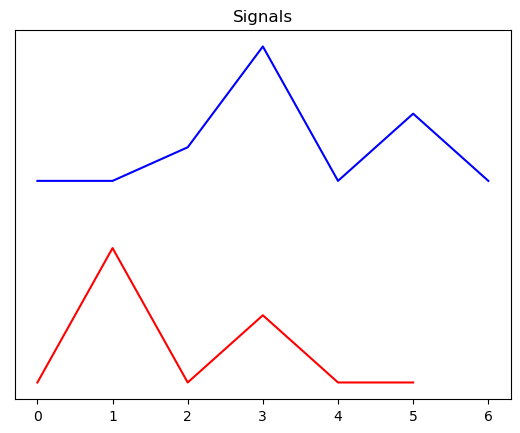

In [28]:
plot_signals(s1, s2, 1)

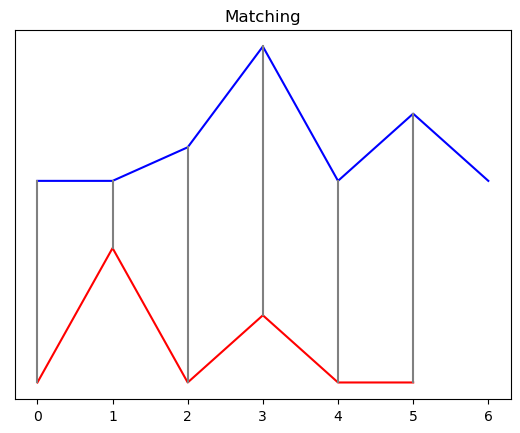

In [37]:
ix_s1 = range(len(s1))
ix_s2 = range(len(s2))

naive_matching = list(zip(ix_s1, ix_s2))

plot_matching(s1, s2, offset=1, matching=naive_matching)

In [41]:
def cost_of_matching(s1, s2, matching):
    cost = 0
    for (ix1, ix2) in matching:
        cost += (s1[ix1] - s2[ix2])**2
    return cost

In [42]:
print(f"SSE cost of naive matching: {cost_of_matching(s1, s2, naive_matching)}")

SSE cost of naive matching: 6.25


#### How do we find a better matching i.e. one that reduces the cost and ensures that every point is in at least one pair?

In [47]:
def dtw(s1, s2):
    
    # initialization as Herman Kamper recommends it
    table = np.zeros((len(s1) + 1, len(s2) + 1))
    table[0, 1:] = np.inf
    table[1:, 0] = np.inf
    
    # uses abs distance instead of squared distance
    dist = lambda x,y : abs(x - y)
    
    # i = row, j = col
    for i in range(len(s1)):
        for j in range(len(s2)):
            
            dist_signals = dist(s1[i], s2[j])
            
            i_table = i + 1
            j_table = j + 1
            
            dist_match = table[i_table - 1, j_table -1]
            dist_insertion = table[i_table - 1, j_table]
            dist_deletion = table[i_table, j_table - 1]
            
            table[i_table, j_table] = dist_signals + min(dist_match, dist_insertion, dist_deletion)
    
    print(table)

In [48]:
dtw(s1, s2)

[[0.  inf inf inf inf inf inf inf]
 [inf 0.  0.  0.5 2.5 2.5 3.5 3.5]
 [inf 2.  2.  1.5 0.5 2.5 3.5 5.5]
 [inf 2.  2.  2.  2.5 0.5 1.5 1.5]
 [inf 3.  3.  2.5 3.  1.5 0.5 1.5]
 [inf 3.  3.  3.  4.5 1.5 1.5 0.5]
 [inf 3.  3.  3.5 5.  1.5 2.5 0.5]]
